<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/20230920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Fashion MNIST 모델 구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Raw Data Loading
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/mnist_train.csv')
# display(df)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/fashion-mnist_train.csv')
display(df)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


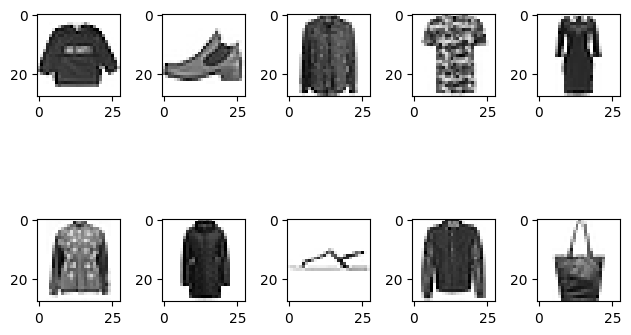

In [10]:
# 이미지 확인

img_data = df.drop('label', axis = 1, inplace = False).values

fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [44]:
# 결측치 무
# 이상치 무
# 정규화 진행

x_data = df.drop('label', axis = 1, inplace = False).values
t_data = df['label'].values.reshape(-1, 1)   # reshape는 x_data는 이미 2차원이라 맞춰 주는거 안해주면 예측을 할 수가 없다 TensorFlow는 그렇다


from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)

x_data_norm = scaler_x.transform(x_data)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape = (784, )))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate = 1e-2), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(x_data_norm, t_data, epochs = 40, verbose = 1, batch_size = 100, validation_split = 0.3)

Epoch 1/40
294/294 [==============================] - 2s 4ms/step - loss: 0.3995 - accuracy: 0.8852 - val_loss: 0.3101 - val_accuracy: 0.9129
Epoch 2/40
294/294 [==============================] - 1s 4ms/step - loss: 0.2968 - accuracy: 0.9143 - val_loss: 0.2991 - val_accuracy: 0.9156
Epoch 3/40
294/294 [==============================] - 1s 4ms/step - loss: 0.2750 - accuracy: 0.9211 - val_loss: 0.3165 - val_accuracy: 0.9083
Epoch 4/40
294/294 [==============================] - 1s 4ms/step - loss: 0.2686 - accuracy: 0.9227 - val_loss: 0.3022 - val_accuracy: 0.9148
Epoch 5/40
294/294 [==============================] - 1s 4ms/step - loss: 0.2607 - accuracy: 0.9255 - val_loss: 0.3017 - val_accuracy: 0.9178
Epoch 6/40
294/294 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.9264 - val_loss: 0.3031 - val_accuracy: 0.9157
Epoch 7/40
294/294 [==============================] - 1s 3ms/step - loss: 0.2514 - accuracy: 0.9287 - val_loss: 0.3060 - val_accuracy: 0.9166
Epoch 

In [18]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


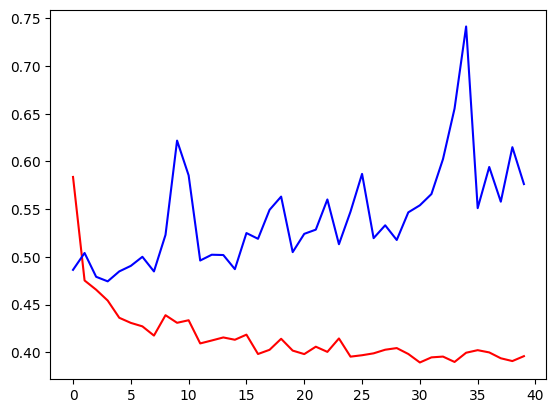

In [19]:
# 학습 결과에대한 그래프를 간단하게 그려보아요
print(result) # History객체
print(result.history.keys())

plt.plot(result.history['loss'], color = 'r')
plt.plot(result.history['val_loss'], color = 'b')
plt.show()

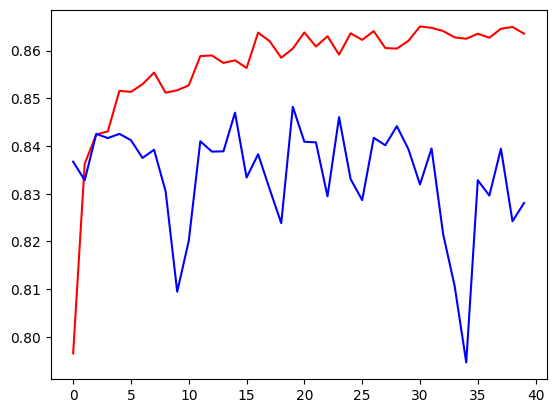

In [20]:
plt.plot(result.history['accuracy'], color = 'r')
plt.plot(result.history['val_accuracy'], color = 'b')
plt.show()

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/data/mnist_train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


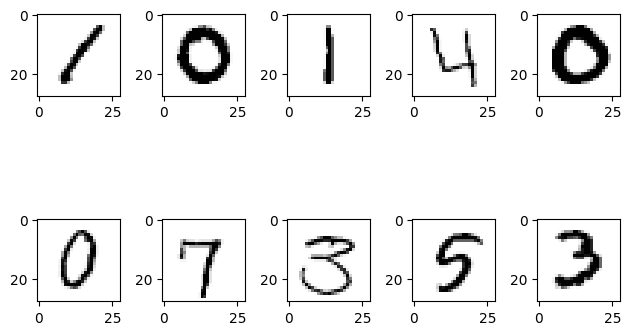

In [22]:
# 이미지 확인

img_data = df.drop('label', axis = 1, inplace = False).values

fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [24]:
# 결측치 무
# 이상치 무
# 정규화 진행

x_data = df.drop('label', axis = 1, inplace = False).values
t_data = df['label'].values.reshape(-1, 1)   # reshape는 x_data는 이미 2차원이라 맞춰 주는거 안해주면 예측을 할 수가 없다 TensorFlow는 그렇다


from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)

x_data_norm = scaler_x.transform(x_data)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape = (784, )))

# Hidden Layer
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = Adam(learning_rate = 1e-2), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

result = model.fit(x_data_norm, t_data, epochs = 40, verbose = 1, batch_size = 100, validation_split = 0.3)

Epoch 1/40
294/294 [==============================] - 2s 5ms/step - loss: 0.3080 - accuracy: 0.9050 - val_loss: 0.1692 - val_accuracy: 0.9484
Epoch 2/40
294/294 [==============================] - 1s 4ms/step - loss: 0.1551 - accuracy: 0.9530 - val_loss: 0.1653 - val_accuracy: 0.9502
Epoch 3/40
294/294 [==============================] - 2s 7ms/step - loss: 0.1284 - accuracy: 0.9610 - val_loss: 0.1357 - val_accuracy: 0.9617
Epoch 4/40
294/294 [==============================] - 2s 7ms/step - loss: 0.1094 - accuracy: 0.9653 - val_loss: 0.1406 - val_accuracy: 0.9597
Epoch 5/40
294/294 [==============================] - 2s 6ms/step - loss: 0.0997 - accuracy: 0.9703 - val_loss: 0.1475 - val_accuracy: 0.9594
Epoch 6/40
294/294 [==============================] - 2s 6ms/step - loss: 0.0901 - accuracy: 0.9722 - val_loss: 0.1900 - val_accuracy: 0.9530
Epoch 7/40
294/294 [==============================] - 1s 4ms/step - loss: 0.0899 - accuracy: 0.9736 - val_loss: 0.1941 - val_accuracy: 0.9571
Epoch 

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59850 (233.79 KB)
Trainable params: 59850 (233.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


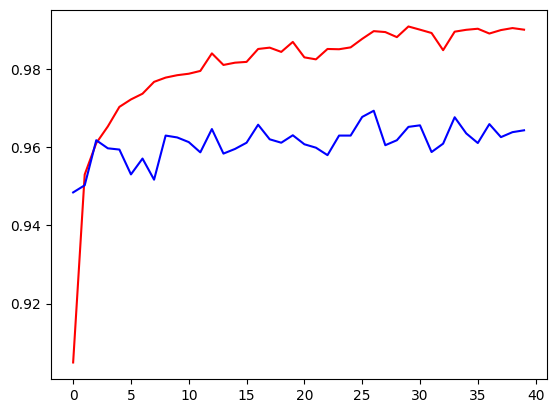

In [26]:
plt.plot(result.history['accuracy'], color = 'r')
plt.plot(result.history['val_accuracy'], color = 'b')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


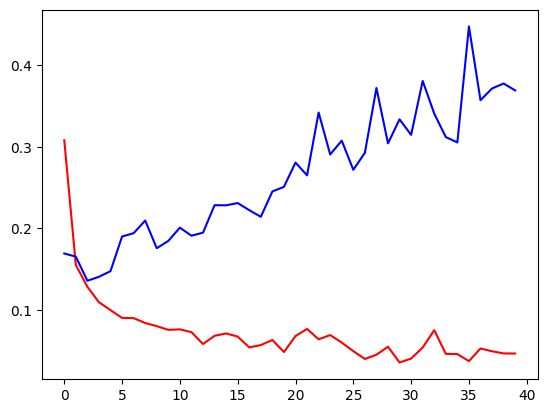

In [27]:
# 학습 결과에대한 그래프를 간단하게 그려보아요
print(result) # History객체
print(result.history.keys())

plt.plot(result.history['loss'], color = 'r')
plt.plot(result.history['val_loss'], color = 'b')
plt.show()

In [28]:
# 이미지 표현

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


<class 'PIL.JpegImagePlugin.JpegImageFile'>


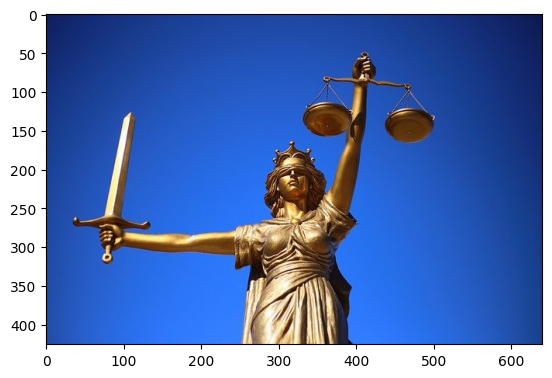

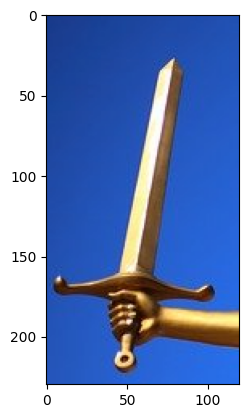

(640, 426)


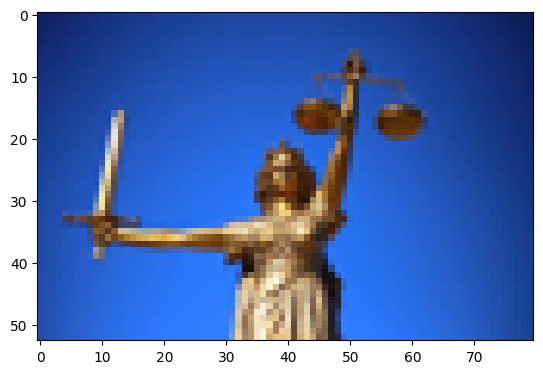

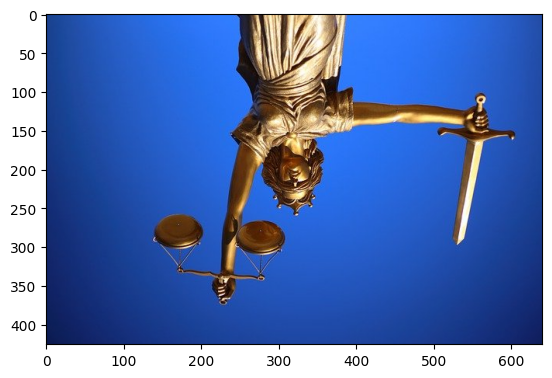

In [38]:
# 이미지 불러오기
img = Image.open('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/image/justice.jpg')
print(type(img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>

plt.imshow(img)
plt.show()

# 해당 이미지가 가지는 pixel 데이터를 추출
pixel = np.array(img)
# print(pixel) # 이미지는 무조건 3차원 데이터로 나옴 외우세요 (가로, 세로, 컬러(채널))

# image crop (원하는 부분만 가져오기)
crop_img = img.crop((30, 100, 150, 330)) # 앞에 두개가 좌상, 뒤에 두개가 우하 , 점 2개를 찍어서 크로핑
plt.imshow(crop_img)
plt.show()

# 이미지 크기 변경 (resize)
print(img.size) # (640, 426) 가로 세로 확인 필수
resize_img = img.resize((int(img.size[0]/8), int(img.size[1]/8)))
plt.imshow(resize_img)
plt.show()

# image 회전 (rotate)
rotate_img = img.rotate(180)
plt.imshow(rotate_img)
plt.show()

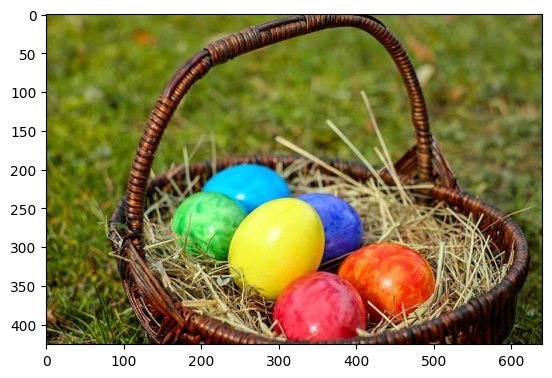

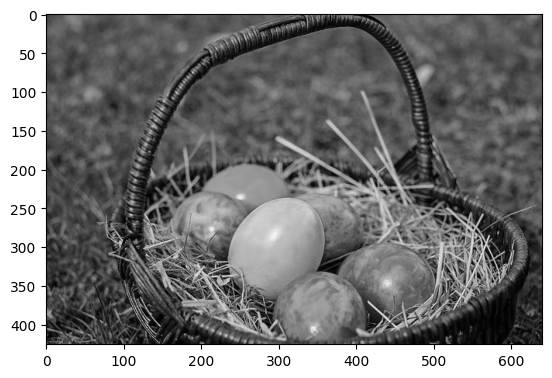

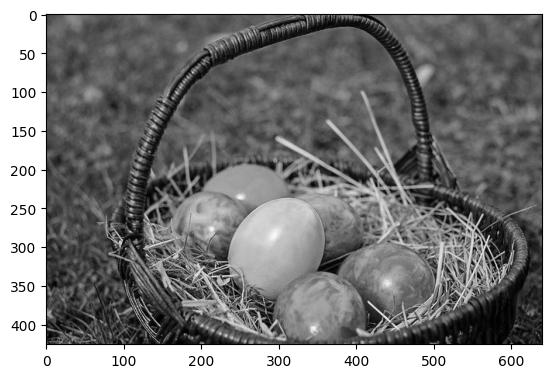

In [43]:
# 이미지 처리
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('/content/drive/MyDrive/Colab Notebooks/ICT Innovation Square/image/fruits.jpg')
# plt.imshow(color_img)

# pixel로 그리기
color_pixel = np.array(color_img)
plt.imshow(color_pixel)
plt.show()

# 흑백으로 만들기
gray_pixel = color_pixel.copy() # ndarray 복사

# 각 필셀의 RGB값의 평균을 구해서 각 픽셀의 값 대체 (3차원 데이터)
for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x]))

plt.imshow(gray_pixel)
plt.show()

# 흑백 이미지는 (height,width)로 표현이 가능 => 2차원 데이터
gray_2d_pixel = gray_pixel[:,:,0]
plt.imshow(gray_2d_pixel, cmap='gray')  # cmap='gray_r'
plt.show()                              # gray-scale image 출력